In [1]:
import cv2
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from glob import iglob

from comparative_feret_algorithms.fast import dimensionality_reduction as dr
from comparative_feret_algorithms.fast import k_nearest_neighbours as knn

from scipy.spatial.distance import cityblock, euclidean, mahalanobis, cosine

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
# Center features by removing the mean
def center(X):
    return X - np.mean(X, axis=0)

# Standardize features by scaling to unit variance
def standardize(X):
    return X / np.std(X, axis=0)

In [3]:
# Read image files
def read_images(directory_name):
    X = []; y = []
    for image in iglob("../data/" + directory_name + "/*.pgm"):
        face = cv2.resize(plt.imread(image), (50, 60)).flatten()
        X = np.append(X, face)
        y = np.append(y, image.split("/")[3][:5])
    X = np.reshape(X, (-1, 3000))
    return X, y

In [4]:
X, y = read_images("training_set")
X = center(X); X = standardize(X)
X_ = X.T
X_ = center(X_); X_ = standardize(X_)

In [15]:
pca = dr.PCA(X, 270, solver="eig")
pca_ = dr.PCA(X_, 270)
ica1 = dr.ICA(X_ @ pca_.components.T, 270)
ica2 = dr.ICA(X @ pca.components.T, 270)
lda = dr.LDA(X @ pca.components.T, y, 224)

In [16]:
PC = pca.components
IC1 = np.dot(ica1.components, PC)
IC2 = np.dot(ica2.components, PC)
LD = np.dot(lda.components, PC)

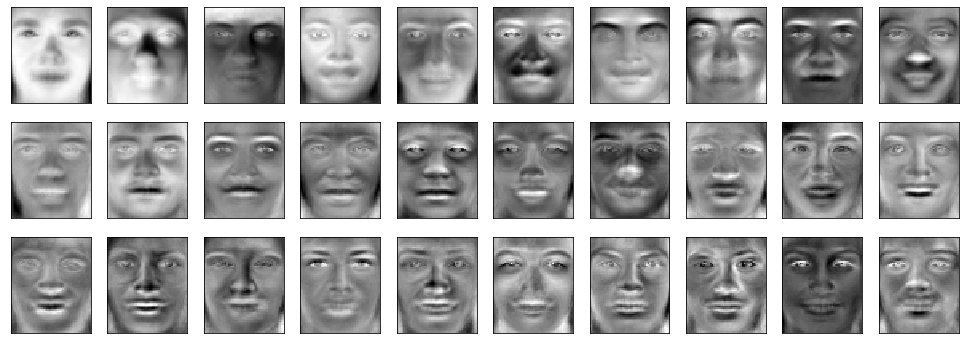

In [7]:
fig, axes = plt.subplots(3, 10, figsize=(17, 6), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(PC[i].reshape(60, 50), cmap="gray")

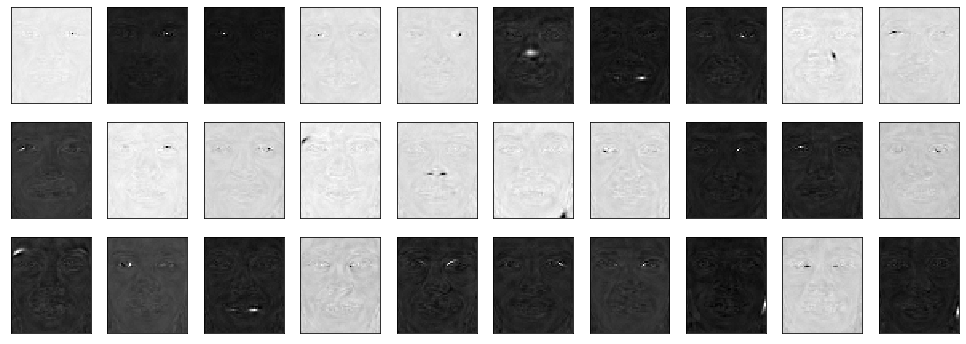

In [8]:
IC1_ = np.dot(ica1.components, np.dot(pca_.components, X))
fig, axes = plt.subplots(3, 10, figsize=(17, 6), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(IC1_[i].reshape(60, 50), cmap="gray")

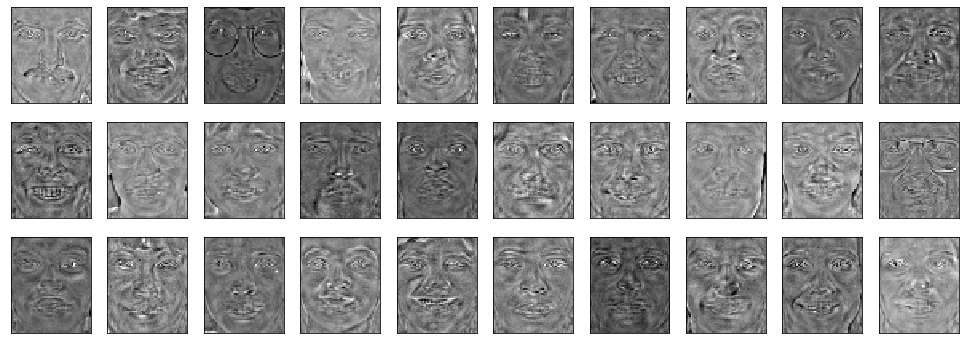

In [9]:
fig, axes = plt.subplots(3, 10, figsize=(17, 6), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(IC2[i].reshape(60, 50), cmap="gray")

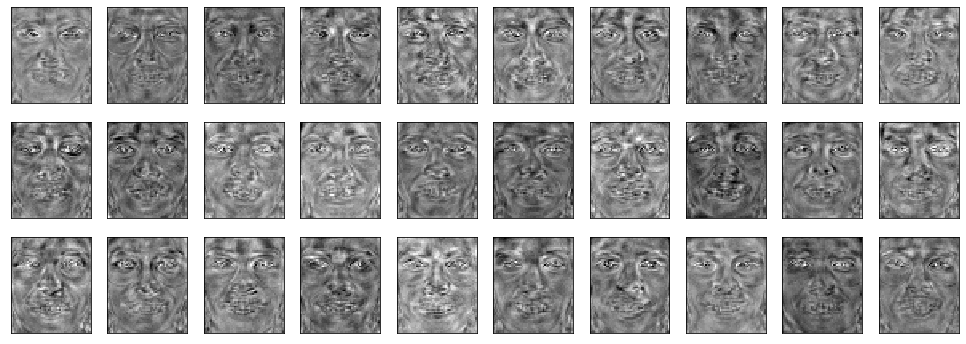

In [10]:
fig, axes = plt.subplots(3, 10, figsize=(17, 6), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(LD[i].reshape(60, 50), cmap="gray")

In [17]:
Xg, yg = read_images("gallery")
Xg = center(Xg); Xg = standardize(Xg)
Xg_pca = Xg @ PC.T
Xfb, yfb = read_images("fb")
Xfb = center(Xfb); Xfb = standardize(Xfb)
Xfb_pca = Xfb @ PC.T
def euclidean(a, b):
    return np.linalg.norm(a - b)

In [23]:
nn = knn.kNN(Xg_pca, yg, euclidean, 100)

In [24]:
true = 0
total = len(Xfb_pca)
for i in range(total):
    if yfb[i] in nn.find_knn(1, Xfb_pca[i]):
        true += 1
print(round(true / total*100, 2))

66.03


In [20]:
l2_pca = NearestNeighbors(n_neighbors=1, metric="l2").fit(Xg_pca)
# Calculate the performance of an algorithms wrt a measure
def performance(nn, X_pr, y_pr, X_gal, y_gal, rank):
    true = 0
    total = X_pr.shape[0]
    for i in range(total):
        if y_pr[i] in [y_gal[i] for i in nn.kneighbors(X=[X_pr[i]], n_neighbors=rank)[1][0]]:
            true += 1
    return round(true / total * 100, 2)
print("PCA+L2: " + str(performance(l2_pca, Xfb_pca, yfb, Xg_pca, yg, 1)) + "%")

PCA+L2: 66.03%


In [ ]:
Xg, yg = read_images("gallery")
Xg = center(Xg); Xg = standardize(Xg)
Xg_pca = Xg @ PC.T
Xg_ica1 = Xg @ IC1.T
Xg_ica2 = Xg @ IC2.T
Xg_lda = Xg @ LD.T

In [ ]:
Xfb, yfb = read_images("fb")
Xfb = center(Xfb); Xfb = standardize(Xfb)
Xfb_pca = Xfb @ PC.T
Xfb_ica1 = Xfb @ IC1.T
Xfb_ica2 = Xfb @ IC2.T
Xfb_lda = Xfb @ LD.T

In [ ]:
Xfc, yfc = read_images("fc")
Xfc = center(Xfc); Xfc = standardize(Xfc)
Xfc_pca = Xfc @ PC.T
Xfc_ica1 = Xfc @ IC1.T
Xfc_ica2 = Xfc @ IC2.T
Xfc_lda = Xfc @ LD.T

In [ ]:
Xd1, yd1 = read_images("dup1")
Xd1 = center(Xd1); Xd1 = standardize(Xd1)
Xd1_pca = Xd1 @ PC.T
Xd1_ica1 = Xd1 @ IC1.T
Xd1_ica2 = Xd1 @ IC2.T
Xd1_lda = Xd1 @ LD.T

In [ ]:
Xd2, yd2 = read_images("dup2")
Xd2 = center(Xd2); Xd2 = standardize(Xd2)
Xd2_pca = Xd2 @ PC.T
Xd2_ica1 = Xd2 @ IC1.T
Xd2_ica2 = Xd2 @ IC2.T
Xd2_lda = Xd2 @ LD.T

In [ ]:
def euclidean(a, b):
    return np.linalg.norm(a - b)

In [ ]:
nn = knn.kNN(Xg_pca, yg, euclidean, 5)
nn.construct_tree()

In [ ]:
true = 0
total = len(Xfb_pca)
for i in range(total):
    if yfb[i] in nn.find_knn(1, Xfb_pca[i]):
        true += 1
print(round(true / total*100, 2))

In [ ]:
def kNN(k, metric, xp, Xg, yg):
    order = []
    for i in range(len(Xg)):
        if metric == "L1":
            order.append((cityblock(xp, Xg[i]), i))
        if metric == "L2":
            order.append((np.linalg.norm(xp - Xg[i]), i))
        if metric == "MAH":
            X = np.vstack([xp, Xg[i]])
            V = np.cov(X.T)
            VI = np.linalg.inv(V)
            order.append((mahalanobis(xp, Xg[i], VI), i))
        if metric == "COS":
            order.append((cosine(xp, Xg[i]), i))
    order = sorted(order)
    return [yg[i[1]] for i in order[:k]]

def perf(rank, metric, Xp, yp, Xg, yg):
    true = 0
    total = len(Xp)
    for i in range(total):
        if yp[i] in kNN(rank, metric, Xp[i], Xg, yg):
            true += 1
    return round(true / total * 100, 2)

In [ ]:
%timeit perf(1, "L2", Xfb_pca, yfb, Xg_pca, yg)

In [ ]:
print("PCA+L1: " + str(perf(1, "L1", Xfb_pca, yfb, Xg_pca, yg)) + "%")
print("PCA+L2: " + str(perf(1, "L2", Xfb_pca, yfb, Xg_pca, yg)) + "%")
#print("PCA+MAH: " + str(perf(1, "MAH", Xfb_pca, yfb, Xg_pca, yg)) + "%")
print("PCA+COS: " + str(perf(1, "COS", Xfb_pca, yfb, Xg_pca, yg)) + "%")

In [ ]:
# Fit PCA Nearest Neighbor classifiers
l1_pca = NearestNeighbors(n_neighbors=1, metric="l1").fit(Xg_pca)
l2_pca = NearestNeighbors(n_neighbors=1, metric="l2").fit(Xg_pca)
mah_pca = NearestNeighbors(n_neighbors=1, metric="mahalanobis", metric_params={'V': np.cov(Xg_pca.T)}).fit(Xg_pca)
cos_pca = NearestNeighbors(n_neighbors=1, metric="cosine").fit(Xg_pca)
# Fit ICA1 Nearest Neighbor classifiers
l1_ica1 = NearestNeighbors(n_neighbors=1, metric="l1").fit(Xg_ica1)
l2_ica1 = NearestNeighbors(n_neighbors=1, metric="l2").fit(Xg_ica1)
mah_ica1 = NearestNeighbors(n_neighbors=1, metric="mahalanobis", metric_params={'V': np.cov(Xg_ica1.T)}).fit(Xg_ica1)
cos_ica1 = NearestNeighbors(n_neighbors=1, metric="cosine").fit(Xg_ica1)
# Fit ICA2 Nearest Neighbor classifiers
l1_ica2 = NearestNeighbors(n_neighbors=1, metric="l1").fit(Xg_ica2)
l2_ica2 = NearestNeighbors(n_neighbors=1, metric="l2").fit(Xg_ica2)
mah_ica2 = NearestNeighbors(n_neighbors=1, metric="mahalanobis", metric_params={'V': np.cov(Xg_ica2.T)}).fit(Xg_ica2)
cos_ica2 = NearestNeighbors(n_neighbors=1, metric="cosine").fit(Xg_ica2)
# Fit LDA Nearest Neighbor classifiers
l1_lda = NearestNeighbors(n_neighbors=1, metric="l1").fit(Xg_lda)
l2_lda = NearestNeighbors(n_neighbors=1, metric="l2").fit(Xg_lda)
mah_lda = NearestNeighbors(n_neighbors=1, metric="mahalanobis", metric_params={'V': np.cov(Xg_lda.T)}).fit(Xg_lda)
cos_lda = NearestNeighbors(n_neighbors=1, metric="cosine").fit(Xg_lda)

In [ ]:
# Calculate the performance of an algorithms wrt a measure
def performance(nn, X_pr, y_pr, X_gal, y_gal, rank):
    true = 0
    total = X_pr.shape[0]
    for i in range(total):
        if y_pr[i] in [y_gal[i] for i in nn.kneighbors(X=[X_pr[i]], n_neighbors=rank)[1][0]]:
            true += 1
    return round(true / total * 100, 2)

# Create a CSM plot
def CSM(nn, probe, gallery):
    csm = []
    for rank in range(0, 81, 5):
        if rank == 0:
            csm.append(performance(nn, probe, gallery, rank+1))
        else:
            csm.append(performance(nn, probe, gallery, rank))
    return csm

In [ ]:
print("PCA+L1: " + str(performance(l1_pca, Xfb_pca, yfb, Xg_pca, yg, 1)) + "%")
print("PCA+L2: " + str(performance(l2_pca, Xfb_pca, yfb, Xg_pca, yg, 1)) + "%")
print("PCA+MAH: " + str(performance(mah_pca, Xfb_pca, yfb, Xg_pca, yg, 1)) + "%")
print("PCA+COS: " + str(performance(cos_pca, Xfb_pca, yfb, Xg_pca, yg, 1)) + "%")

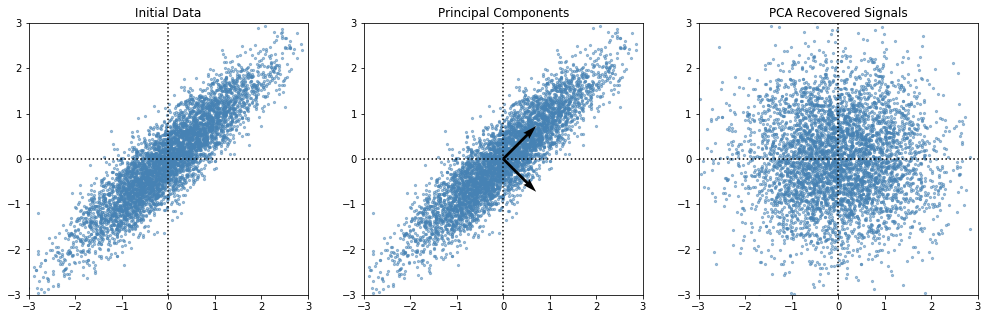

In [173]:
test_PCA()

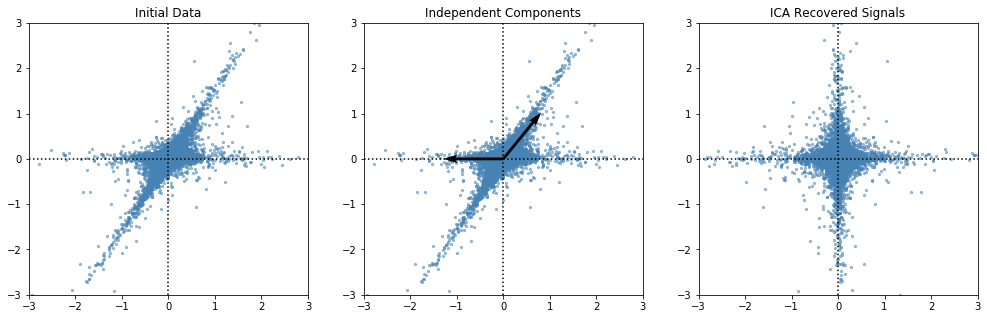

In [121]:
test_ICA()

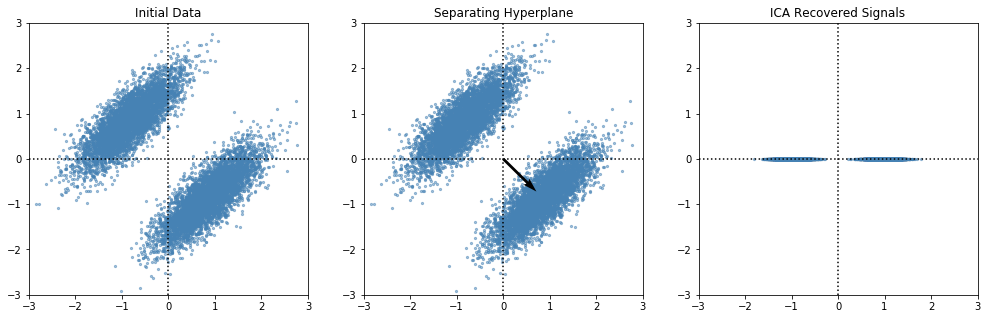

In [172]:
test_LDA()

In [ ]:
print("ICA1+L1: " + str(performance(l1_ica1, Xfb_ica1, yfb, Xg_ica1, yg, 1)) + "%")
print("ICA1+L2: " + str(performance(l2_ica1, Xfb_ica1, yfb, Xg_ica1, yg, 1)) + "%")
print("ICA1+MAH: " + str(performance(mah_ica1, Xfb_ica1, yfb, Xg_ica1, yg, 1)) + "%")
print("ICA1+COS: " + str(performance(cos_ica1, Xfb_ica1, yfb, Xg_ica1, yg, 1)) + "%")

In [ ]:
print("ICA2+L1: " + str(performance(l1_ica2, Xfb_ica2, yfb, Xg_ica2, yg, 1)) + "%")
print("ICA2+L2: " + str(performance(l2_ica2, Xfb_ica2, yfb, Xg_ica2, yg, 1)) + "%")
print("ICA2+MAH: " + str(performance(mah_ica2, Xfb_ica2, yfb, Xg_ica2, yg, 1)) + "%")
print("ICA2+COS: " + str(performance(cos_ica2, Xfb_ica2, yfb, Xg_ica2, yg, 1)) + "%")

In [ ]:
print("LDA+L1: " + str(performance(l1_lda, Xfb_lda, yfb, Xg_lda, yg, 1)) + "%")
print("LDA+L2: " + str(performance(l2_lda, Xfb_lda, yfb, Xg_lda, yg, 1)) + "%")
print("LDA+MAH: " + str(performance(mah_lda, Xfb_lda, yfb, Xg_lda, yg, 1)) + "%")
print("LDA+COS: " + str(performance(cos_lda, Xfb_lda, yfb, Xg_lda, yg, 1)) + "%")

In [ ]:
print("PCA+L1: " + str(performance(l1_pca, Xfc_pca, yfc, Xg_pca, yg, 1)) + "%")
print("PCA+L2: " + str(performance(l2_pca, Xfc_pca, yfc, Xg_pca, yg, 1)) + "%")
print("PCA+MAH: " + str(performance(mah_pca, Xfc_pca, yfc, Xg_pca, yg, 1)) + "%")
print("PCA+COS: " + str(performance(cos_pca, Xfc_pca, yfc, Xg_pca, yg, 1)) + "%")

In [ ]:
print("ICA1+L1: " + str(performance(l1_ica1, Xfc_ica1, yfc, Xg_ica1, yg, 1)) + "%")
print("ICA1+L2: " + str(performance(l2_ica1, Xfc_ica1, yfc, Xg_ica1, yg, 1)) + "%")
print("ICA1+MAH: " + str(performance(mah_ica1, Xfc_ica1, yfc, Xg_ica1, yg, 1)) + "%")
print("ICA1+COS: " + str(performance(cos_ica1, Xfc_ica1, yfc, Xg_ica1, yg, 1)) + "%")

In [ ]:
print("ICA2+L1: " + str(performance(l1_ica2, Xfc_ica2, yfc, Xg_ica2, yg, 1)) + "%")
print("ICA2+L2: " + str(performance(l2_ica2, Xfc_ica2, yfc, Xg_ica2, yg, 1)) + "%")
print("ICA2+MAH: " + str(performance(mah_ica2, Xfc_ica2, yfc, Xg_ica2, yg, 1)) + "%")
print("ICA2+COS: " + str(performance(cos_ica2, Xfc_ica2, yfc, Xg_ica2, yg, 1)) + "%")

In [ ]:
print("LDA+L1: " + str(performance(l1_lda, Xfc_lda, yfc, Xg_lda, yg, 1)) + "%")
print("LDA+L2: " + str(performance(l2_lda, Xfc_lda, yfc, Xg_lda, yg, 1)) + "%")
print("LDA+MAH: " + str(performance(mah_lda, Xfc_lda, yfc, Xg_lda, yg, 1)) + "%")
print("LDA+COS: " + str(performance(cos_lda, Xfc_lda, yfc, Xg_lda, yg, 1)) + "%")

In [ ]:
print("PCA+L1: " + str(performance(l1_pca, Xd1_pca, yd1, Xg_pca, yg, 1)) + "%")
print("PCA+L2: " + str(performance(l2_pca, Xd1_pca, yd1, Xg_pca, yg, 1)) + "%")
print("PCA+MAH: " + str(performance(mah_pca, Xd1_pca, yd1, Xg_pca, yg, 1)) + "%")
print("PCA+COS: " + str(performance(cos_pca, Xd1_pca, yd1, Xg_pca, yg, 1)) + "%")

In [28]:
# Display scatterplot of the data
def plot_data(X, title):
    if X.shape[1] == 1:
        plt.scatter(X[:, 0], np.zeros(X.shape[0]), s=5, color='steelblue', alpha=0.5)
    else:
        plt.scatter(X[:, 0], X[:, 1], s=5, color='steelblue', alpha=0.5)
    plt.hlines(0, -3, 3, linestyle=':'); plt.vlines(0, -3, 3, linestyle=':')
    plt.xlim(-3, 3); plt.ylim(-3, 3)
    plt.title(title)
    
# Display a list of vectors on a plot
def plot_vectors(vectors):
    for vector in vectors:
        x_axis, y_axis = vector
        plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2)
        plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6)

# Display the results of experiments
def create_report(X, transform, title1, title2, title3):
    plt.figure(figsize=(17, 5))
    plt.subplot(131); plot_data(X / X.std(), title1)
    plt.subplot(132); plot_data(X / X.std(), title2); plot_vectors(transform.T) if transform.shape[0] == 2 else plot_vectors(transform)
    plt.subplot(133); plot_data(standardize(X @ transform.T), title3)
    plt.show()

# Conduct a test to check the accuracy of PCA on a dummy dataset
def test_PCA():
    A = np.array([[1, 0], [2, 2]])
    X = rng.normal(0, 1, size=(5000, 2))
    X_pca = X @ A
    X_pca = center(X_pca); X_pca = standardize(X_pca)
    pca = dr.PCA(X_pca, 2).get_components()
    # Display results
    create_report(X_pca, pca, "Initial Data", "Principal Components", "PCA Recovered Signals")
    
# Conduct a test to check the accuracy of ICA on a dummy dataset
def test_ICA():
    A = np.array([[1, 0], [1, 2]])
    X = rng.standard_t(1.5, size=(15000, 2))
    X_ica = X @ A
    X_ica = center(X_ica); X_ica = standardize(X_ica)
    ica = dr.ICA(X_ica, 2).get_components()
    # Display results
    create_report(X_ica, ica, "Initial Data", "Independent Components", "ICA Recovered Signals")
        
# Conduct a test to check the accuracy of LDA on a dummy dataset
def test_LDA():
    A = np.array([[-1, -2], [2, 1]])
    X = np.concatenate((rng.normal(-7, 2, size=(5000, 2)), rng.normal(7, 2, size=(5000, 2))), axis=0)
    X_lda = X @ A
    y_lda = [0] * 5000 + [1] * 5000
    X_lda = center(X_lda); X_lda = standardize(X_lda)
    lda = dr.LDA(X_lda, y_lda, 1).get_components()
    # Display results
    create_report(X_lda, lda, "Initial Data", "Separating Hyperplane", "ICA Recovered Signals")

In [ ]:
print("ICA1+L1: " + str(performance(l1_ica1, Xd1_ica1, yd1, Xg_ica1, yg, 1)) + "%")
print("ICA1+L2: " + str(performance(l2_ica1, Xd1_ica1, yd1, Xg_ica1, yg, 1)) + "%")
print("ICA1+MAH: " + str(performance(mah_ica1, Xd1_ica1, yd1, Xg_ica1, yg, 1)) + "%")
print("ICA1+COS: " + str(performance(cos_ica1, Xd1_ica1, yd1, Xg_ica1, yg, 1)) + "%")

In [ ]:
print("ICA2+L1: " + str(performance(l1_ica2, Xd1_ica2, yd1, Xg_ica2, yg, 1)) + "%")
print("ICA2+L2: " + str(performance(l2_ica2, Xd1_ica2, yd1, Xg_ica2, yg, 1)) + "%")
print("ICA2+MAH: " + str(performance(mah_ica2, Xd1_ica2, yd1, Xg_ica2, yg, 1)) + "%")
print("ICA2+COS: " + str(performance(cos_ica2, Xd1_ica2, yd1, Xg_ica2, yg, 1)) + "%")

In [ ]:
print("LDA+L1: " + str(performance(l1_lda, Xd1_lda, yd1, Xg_lda, yg, 1)) + "%")
print("LDA+L2: " + str(performance(l2_lda, Xd1_lda, yd1, Xg_lda, yg, 1)) + "%")
print("LDA+MAH: " + str(performance(mah_lda, Xd1_lda, yd1, Xg_lda, yg, 1)) + "%")
print("LDA+COS: " + str(performance(cos_lda, Xd1_lda, yd1, Xg_lda, yg, 1)) + "%")

In [ ]:
print("PCA+L1: " + str(performance(l1_pca, Xd2_pca, yd2, Xg_pca, yg, 1)) + "%")
print("PCA+L2: " + str(performance(l2_pca, Xd2_pca, yd2, Xg_pca, yg, 1)) + "%")
print("PCA+MAH: " + str(performance(mah_pca, Xd2_pca, yd2, Xg_pca, yg, 1)) + "%")
print("PCA+COS: " + str(performance(cos_pca, Xd2_pca, yd2, Xg_pca, yg, 1)) + "%")

In [ ]:
print("ICA1+L1: " + str(performance(l1_ica1, Xd2_ica1, yd2, Xg_ica1, yg, 1)) + "%")
print("ICA1+L2: " + str(performance(l2_ica1, Xd2_ica1, yd2, Xg_ica1, yg, 1)) + "%")
print("ICA1+MAH: " + str(performance(mah_ica1, Xd2_ica1, yd2, Xg_ica1, yg, 1)) + "%")
print("ICA1+COS: " + str(performance(cos_ica1, Xd2_ica1, yd2, Xg_ica1, yg, 1)) + "%")

In [ ]:
print("ICA2+L1: " + str(performance(l1_ica2, Xd2_ica2, yd2, Xg_ica2, yg, 1)) + "%")
print("ICA2+L2: " + str(performance(l2_ica2, Xd2_ica2, yd2, Xg_ica2, yg, 1)) + "%")
print("ICA2+MAH: " + str(performance(mah_ica2, Xd2_ica2, yd2, Xg_ica2, yg, 1)) + "%")
print("ICA2+COS: " + str(performance(cos_ica2, Xd2_ica2, yd2, Xg_ica2, yg, 1)) + "%")

In [ ]:
print("LDA+L1: " + str(performance(l1_lda, Xd2_lda, yd2, Xg_lda, yg, 1)) + "%")
print("LDA+L2: " + str(performance(l2_lda, Xd2_lda, yd2, Xg_lda, yg, 1)) + "%")
print("LDA+MAH: " + str(performance(mah_lda, Xd2_lda, yd2, Xg_lda, yg, 1)) + "%")
print("LDA+COS: " + str(performance(cos_lda, Xd2_lda, yd2, Xg_lda, yg, 1)) + "%")

In [ ]:
CMS_fb = pd.DataFrame()

In [ ]:
CMS_fb["PCA_L1"] = CSM(nn_l1, fb, gallery)
CMS_fb["PCA_L2"] = CSM(nn_l2, fb, gallery)
CMS_fb["PCA_COS"] = CSM(nn_cos, fb, gallery)
CMS_fb["PCA_MAH"] = CSM(nn_mah, fb, gallery)

In [ ]:
CMS_fb = CMS_fb.reset_index().rename(columns={'index':'rank'})
CMS_fb['rank'] *= 5
CMS_fb.at[0, 'rank'] = 1

In [ ]:
CMS_fb = pd.melt(CMS_fb, id_vars=['rank'], value_vars=['PCA_L1', 'PCA_L2', 'PCA_COS', 'PCA_MAH']).rename(columns={'variable': 'algorithm'})

alt.Chart(CMS_fb).mark_line().encode(
    alt.X('rank:Q'),
    alt.Y('value:Q', scale=alt.Scale(domain=(55, 100))),
    alt.Color('algorithm:N'),
    alt.Shape('algorithm:N'),
    alt.Tooltip('value:Q')
).interactive()

In [ ]:
nn_l1 = NearestNeighbors(n_neighbors=1, metric="manhattan")
nn_l1.fit(gallery)
print(str(performance(nn_l1, fc, gallery, 1)) + " %")

In [ ]:
nn_l2 = NearestNeighbors(n_neighbors=1, metric="euclidean")
nn_l2.fit(gallery)
print(str(performance(nn_l2, fc, gallery, 1)) + " %")

In [ ]:
nn_mah = NearestNeighbors(n_neighbors=1, metric="mahalanobis", metric_params={'V': np.cov(gallery.T)})
nn_mah.fit(gallery)
print(str(performance(nn_mah, fc, gallery, 1)) + " %")

In [ ]:
nn_cos = NearestNeighbors(n_neighbors=1, metric="cosine")
nn_cos.fit(gallery)
print(str(performance(nn_cos, fc, gallery, 1)) + " %")

In [ ]:
CMS_fc = pd.DataFrame()

In [ ]:
CMS_fc["PCA_L1"] = CSM(nn_l1, fc, gallery)
CMS_fc["PCA_L2"] = CSM(nn_l2, fc, gallery)
CMS_fc["PCA_COS"] = CSM(nn_cos, fc, gallery)
CMS_fc["PCA_MAH"] = CSM(nn_mah, fc, gallery)

In [ ]:
CMS_fc = CMS_fc.reset_index().rename(columns={'index':'rank'})
CMS_fc['rank'] *= 5
CMS_fc.at[0, 'rank'] = 1

In [ ]:
CMS_fc = pd.melt(CMS_fc, id_vars=['rank'], value_vars=['PCA_L1', 'PCA_L2', 'PCA_COS', 'PCA_MAH']).rename(columns={'variable': 'algorithm'})

alt.Chart(CMS_fc).mark_line().encode(
    alt.X('rank:Q'),
    alt.Y('value:Q', scale=alt.Scale(domain=(45, 100))),
    alt.Color('algorithm:N'),
    alt.Shape('algorithm:N'),
    alt.Tooltip('value:Q')
).interactive()

In [ ]:
CMS_dup1 = pd.DataFrame()

In [ ]:
CMS_dup1["PCA_L1"] = CSM(nn_l1, dup1, gallery)
CMS_dup1["PCA_L2"] = CSM(nn_l2, dup1, gallery)
CMS_dup1["PCA_COS"] = CSM(nn_cos, dup1, gallery)
CMS_dup1["PCA_MAH"] = CSM(nn_mah, dup1, gallery)

In [ ]:
CMS_dup1 = CMS_dup1.reset_index().rename(columns={'index':'rank'})
CMS_dup1['rank'] *= 5
CMS_dup1.at[0, 'rank'] = 1

In [ ]:
CMS_dup1 = pd.melt(CMS_dup1, id_vars=['rank'], value_vars=['PCA_L1', 'PCA_L2', 'PCA_COS', 'PCA_MAH']).rename(columns={'variable': 'algorithm'})

alt.Chart(CMS_dup1).mark_line().encode(
    alt.X('rank:Q'),
    alt.Y('value:Q', scale=alt.Scale(domain=(20, 75))),
    alt.Color('algorithm:N'),
    alt.Shape('algorithm:N'),
    alt.Tooltip('value:Q')
).interactive()

In [ ]:
CMS_dup2 = pd.DataFrame()

In [ ]:
CMS_dup2["PCA_L1"] = CSM(nn_l1, dup2, gallery)
CMS_dup2["PCA_L2"] = CSM(nn_l2, dup2, gallery)
CMS_dup2["PCA_COS"] = CSM(nn_cos, dup2, gallery)
CMS_dup2["PCA_MAH"] = CSM(nn_mah, dup2, gallery)

In [ ]:
CMS_dup2 = CMS_dup2.reset_index().rename(columns={'index':'rank'})
CMS_dup2['rank'] *= 5
CMS_dup2.at[0, 'rank'] = 1

In [ ]:
CMS_dup2 = pd.melt(CMS_dup2, id_vars=['rank'], value_vars=['PCA_L1', 'PCA_L2', 'PCA_COS', 'PCA_MAH']).rename(columns={'variable': 'algorithm'})

alt.Chart(CMS_dup2).mark_line().encode(
    alt.X('rank:Q'),
    alt.Y('value:Q', scale=alt.Scale(domain=(15, 75))),
    alt.Color('algorithm:N'),
    alt.Shape('algorithm:N'),
    alt.Tooltip('value:Q')
).interactive()

In [ ]:
# Plot rows of 10 images from a dataset
def plot_images(n_rows, X, title):
    fig, axes = plt.subplots(n_rows, 10, figsize=(17, 2), subplot_kw={"xticks":[], "yticks":[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i].reshape(60, 50))
    fig.suptitle(title)

In [ ]:
X, y = read_images("training_set")
X = center(X); X = standardize(X)

In [ ]:
import dimensionality_reduction as dr

In [ ]:
pca = dr.PCA(X, 270)

In [ ]:
pca.get_explained_variance()

In [ ]:
import numbers
[isinstance(i, numbers.Integral) for i in np.array([0, 1, 2]).flatten()]

In [ ]:
np.array([0, 1, 2]).flatten()

In [ ]:
isinstance(2, (int, float, complex))

In [ ]:
[i for i in np.array([0, 1, 2]).flatten()]

In [ ]:
isinstance(0, (int, float, complex)) and not isinstance(0, bool)

In [ ]:
a = [3, 1, 2]
a.index(1)

In [ ]:
np.array([[6, 6], [6, 9], [9, 5], [9, 9], [9, 10]])

In [ ]:
np.array_equal([[2, 1], [1, 2]], [[1, 2], [2, 1]])

In [ ]:
np.array([9, 4]).shape

In [ ]:
len(np.array([[1, 2], [1], [1, 2, 3]]).shape)

In [6]:
S = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
v = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
l = np.array([6, 6, 6])

In [36]:
np.outer(l, v.T)

array([[ 0, 18, 36,  6, 24, 42, 12, 30, 48],
       [ 0, 18, 36,  6, 24, 42, 12, 30, 48],
       [ 0, 18, 36,  6, 24, 42, 12, 30, 48]])

In [31]:
np.dot(v, S.T)

array([[ 3,  6,  9],
       [12, 24, 36],
       [21, 42, 63]])

In [11]:
v

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [9]:
a = [1, 2, 0]

In [21]:
np.array([v[i] for i in a])

array([[3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]])